In [1]:
from pathlib import Path
import pandas as pd

root = Path(r"C:\Users\Klelia\Desktop\see-animal-dl\data\see-animals-dataset")

total_images = len(list(root.rglob("*.jpg"))) 
print("Total images:", total_images)

total_classes = len([p for p in root.iterdir() if p.is_dir()])
print("Total classes:", total_classes)

classes = [p.name for p in root.iterdir() if p.is_dir()]
counts  = [len(list((root/p).rglob("*.jpg"))) for p in classes]

df = pd.DataFrame({"class": classes, "images": counts}) \
       .sort_values("images", ascending=False)

print(df)


Total images: 13666
Total classes: 24
              class  images
22  Turtle_Tortoise    1865
6        Jelly Fish     842
3           Dolphin     774
18           Sharks     587
15      Sea Urchins     578
23            Whale     569
10          Octopus     561
13          Puffers     530
14         Sea Rays     517
9       Nudibranchs     500
11            Otter     499
7           Lobster     498
1            Corals     498
2             Crabs     497
0             Clams     497
4               Eel     496
21         Starfish     495
5              Fish     493
19           Shrimp     488
12          Penguin     481
20            Squid     480
16         Seahorse     476
17             Seal     412
8        mislabeled      33


### Sanity Check
Check for corrupted images

In [2]:
from PIL import Image
bad = []
for img_path in Path("data/see-animals-dataset").rglob("*.jpg"):
    try:
        Image.open(img_path).verify()
    except Exception:
        bad.append(img_path)
print("Corrupted:", len(bad))

Corrupted: 0


### Display 3 images per class

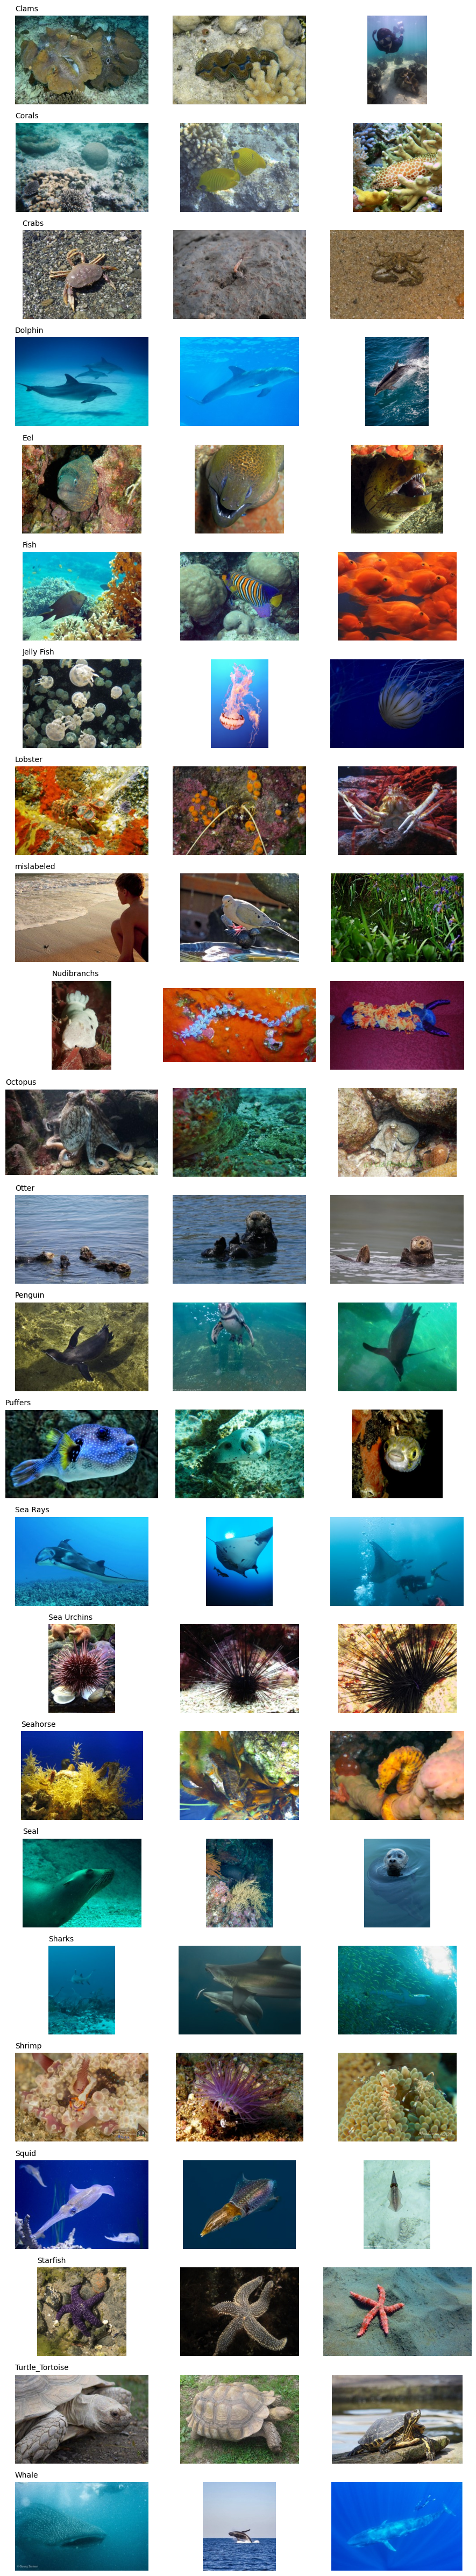

In [3]:
import random, matplotlib.pyplot as plt
import matplotlib.image as mpimg

samples_per_class = 3
fig, axes = plt.subplots(len(classes), samples_per_class, figsize=(9, 2*len(classes)))

for row, cls in enumerate(classes):
    images = list((root/cls).rglob("*.jpg"))
    for col, img_path in enumerate(random.sample(images, samples_per_class)):
        axes[row, col].imshow(mpimg.imread(img_path))
        axes[row, col].axis("off")
        if col == 0:
            axes[row, col].set_title(cls, fontsize=10, loc="left")

plt.tight_layout()
plt.show()


### Display 10 random pics per class

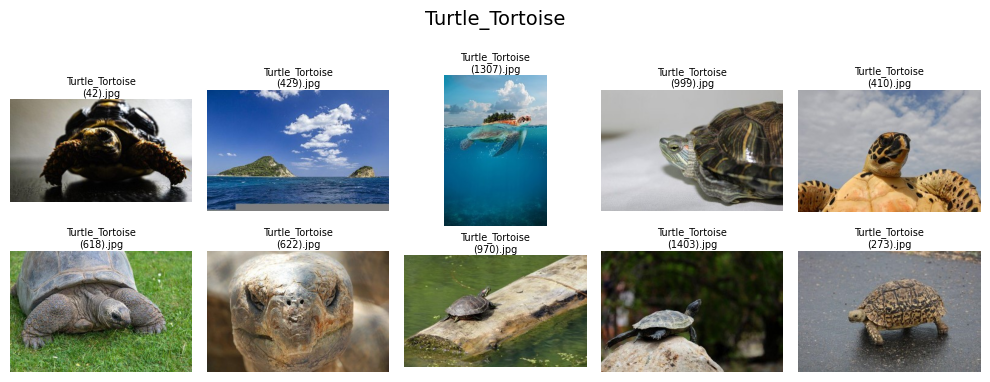

In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import textwrap

class_name = "Turtle_Tortoise"                  
n_images   = 10   

cls_dir = root / class_name
assert cls_dir.exists(), f"Class «{class_name}» not found!"

all_imgs = list(cls_dir.rglob("*.jpg"))
assert all_imgs, "There are no images in this folder."

sample = random.sample(all_imgs, min(n_images, len(all_imgs)))

# φτιάχνει πλέγμα 2 × 5 (ή όσο χρειάζεται)
cols = 5
rows = (len(sample) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))

for ax, img_path in zip(axes.ravel(), sample):
    ax.imshow(mpimg.imread(img_path))
    ax.axis("off")

    title = "\n".join(textwrap.wrap(img_path.name, width=20))
    ax.set_title(title, fontsize=7, pad=2)

for ax in axes.ravel()[len(sample):]:
    ax.axis("off")

fig.suptitle(class_name, fontsize=14)
plt.tight_layout()
plt.show()

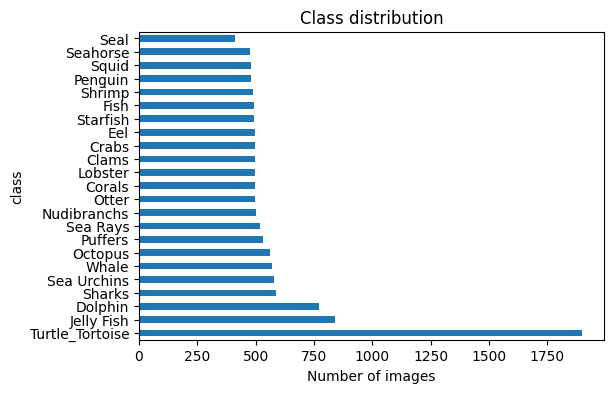

In [9]:
import matplotlib.pyplot as plt

df.plot(kind="barh", x="class", y="images", legend=False, figsize=(6,4))
plt.xlabel("Number of images")
plt.title("Class distribution")
plt.show()
